In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import nltk
from nltk.corpus import gutenberg
nltk.download('punkt')
nltk.download('gutenberg')
import re
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /Users/helen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /Users/helen/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
emma=gutenberg.paras('austen-emma.txt')
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    para=[re.sub(r'--', '', word) for word in para]
    emma_paras.append(' '.join(para))
    
print(emma_paras[0:4])

['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


In [4]:
emma[0][0]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']']

In [5]:
emma_test = []
emma_test.append(' - '.join(emma[0][0]))
emma_test

['[ - Emma - by - Jane - Austen - 1816 - ]']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
x_train, x_test = train_test_split(emma_paras, test_size=0.4, random_state=0)
vectorizer = TfidfVectorizer(max_df=0.5,
                            min_df=2,
                            stop_words='english',
                            lowercase=True,
                            use_idf=True,
                            norm=u'l2',
                            smooth_idf=True)

In [7]:
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

Number of features: 1948


In [8]:
emma_paras_tfidf[0:10, 0:10]

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [9]:
x_train_tfidf, x_test_tfidf = train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)

In [10]:
x_train_tfidf_csr = x_train_tfidf.tocsr()

In [11]:
n = x_train_tfidf_csr.shape[0]

In [12]:
n

1422

In [13]:
x_train_tfidf_csr[0:10, 0:10]

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [14]:
tfidf_bypara = [{} for _ in range(0, n)]

In [15]:
terms = vectorizer.get_feature_names()

In [16]:
terms

['_has_',
 '_her_',
 '_him_',
 '_home_',
 '_i_',
 '_is_',
 '_me_',
 '_my_',
 '_not_',
 '_one_',
 '_she_',
 '_that_',
 '_then_',
 '_very_',
 '_we_',
 '_you_',
 'abbey',
 'able',
 'abroad',
 'absence',
 'absent',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'accompanied',
 'accomplished',
 'account',
 'acknowledge',
 'acknowledged',
 'acquaintance',
 'acquainted',
 'acquiescence',
 'acquirements',
 'act',
 'acting',
 'activity',
 'actually',
 'added',
 'address',
 'addressed',
 'addressing',
 'admiration',
 'admire',
 'admired',
 'admit',
 'admitted',
 'advanced',
 'advantage',
 'advantages',
 'adventure',
 'advice',
 'advise',
 'advised',
 'affair',
 'affected',
 'affection',
 'affectionate',
 'afford',
 'afforded',
 'affronted',
 'afraid',
 'afternoon',
 'age',
 'agitated',
 'agitation',
 'ago',
 'agree',
 'agreeable',
 'agreed',
 'ah',
 'aimed',
 'air',
 'alarm',
 'alarming',
 'alertness',
 'alike',
 'alleviation',
 'alliance',
 'allow',
 'allowed',
 'allowing'

In [17]:
for i, j in zip(*x_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = x_train_tfidf_csr[i, j]

In [18]:
x_train_tfidf_csr.nonzero()

(array([   1,    1,    1, ..., 1421, 1421, 1421], dtype=int32),
 array([1610, 1184, 1942, ...,  823,  868, 1037], dtype=int32))

In [19]:
tfidf_bypara

[{},
 {'solicitude': 0.557269551945157,
  'obliged': 0.4104357086766906,
  'yes': 0.3371013748193162,
  'kind': 0.4160277234844895,
  'sir': 0.3798402568960988,
  'did': 0.299996918561262},
 {'book': 0.3873103398517667,
  'inquire': 0.3873103398517667,
  'forgetting': 0.3960574594139842,
  'plain': 0.37973324023790195,
  'business': 0.3150772301605738,
  'circumstance': 0.3521836055701044,
  'recommended': 0.419065154111821},
 {'accepted': 0.15893875642089123,
  'seriously': 0.14850853274134498,
  'resolved': 0.15489271400624896,
  'effect': 0.1514718338876578,
  'fail': 0.16389071212512824,
  'ardent': 0.1702748933900322,
  'refused': 0.1702748933900322,
  'die': 0.1702748933900322,
  'hoping': 0.1702748933900322,
  'sentiments': 0.16389071212512824,
  'seized': 0.16389071212512824,
  'cut': 0.15489271400624896,
  'joined': 0.15893875642089123,
  'calmness': 0.16389071212512824,
  'scarcely': 0.29178943177473937,
  'opportunity': 0.14589471588736969,
  'gate': 0.15893875642089123,
  '

In [20]:
print('Original sentence:', x_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'minutes': 0.7127450310382584, 'present': 0.701423210857947}


In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [22]:
svd = TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
lsa

Pipeline(memory=None,
     steps=[('truncatedsvd', TruncatedSVD(algorithm='randomized', n_components=130, n_iter=5,
       random_state=None, tol=0.0)), ('normalizer', Normalizer(copy=False, norm='l2'))])

In [23]:
x_train_lsa = lsa.fit_transform(x_train_tfidf)

In [24]:
x_train_lsa

array([[ 2.16816729e-02, -4.52479593e-01, -8.56212209e-02, ...,
        -1.90298645e-01, -3.07341531e-02, -3.94804133e-02],
       [ 1.41106712e-02,  1.25623026e-01, -2.31411706e-07, ...,
        -2.30360475e-02,  4.57491371e-02, -6.75053062e-03],
       [ 1.72149506e-04,  3.15433515e-02, -8.46463593e-07, ...,
        -9.64447784e-02,  4.46746860e-02, -1.44678198e-02],
       ...,
       [ 7.26730582e-03,  4.45073261e-02,  1.07217051e-06, ...,
         2.28295575e-02, -2.69546219e-02,  9.86531160e-03],
       [ 2.30200293e-03,  2.67672143e-01, -8.83419730e-07, ...,
        -1.12421036e-01, -3.18770166e-02, -1.14177933e-01],
       [ 8.29034141e-03,  1.93855079e-01, -1.04238368e-06, ...,
         2.17021581e-01, -1.01340587e-01, -1.17417709e-01]])

In [25]:
x_train_lsa.shape

(1422, 130)

In [26]:
variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print('Percent variance captured by all components:', total_variance*100)

Percent variance captured by all components: 45.18903492695158


In [27]:
paras_by_component = pd.DataFrame(x_train_lsa, index=x_train)
for i in range(5):
    print('Component {}'.format(i))
    print(paras_by_component.loc[:, i].sort_values(ascending=False)[0:10])

Component 0
" Oh !     0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !"    0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !"    0.999288
" Oh !     0.999288
" Oh !     0.999288
Name: 0, dtype: float64
Component 1
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.634358
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.577568
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I think it a bad thing ."    0.564846
" You are right , Mrs . Weston ," said Mr . Knightley warmly , " Miss Fairfax is as capable as any of us of forming a just opinion of Mrs . Elton .                         0.564677
" There were misunderstandin

In [28]:
paras_by_component

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
That is _court_ .,2.168167e-02,-4.524796e-01,-8.562122e-02,-5.094306e-03,7.899844e-02,9.848922e-02,-4.577571e-02,-0.148086,-2.399317e-01,1.186010e-01,...,0.041531,0.047940,0.113792,0.074852,0.107082,0.002898,0.046894,-0.190299,-0.030734,-0.039480
""" Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me .""",1.411067e-02,1.256230e-01,-2.314117e-07,3.240741e-03,4.196445e-02,3.979946e-02,-3.412851e-02,0.127794,1.908130e-01,-6.042006e-03,...,0.000189,-0.022616,0.012855,0.010487,-0.013670,0.016142,-0.013485,-0.023036,0.045749,-0.006751
""" How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .",1.721495e-04,3.154335e-02,-8.464636e-07,8.509034e-03,-9.001289e-04,1.193229e-02,-1.485614e-02,-0.002135,-3.366256e-03,1.189928e-02,...,-0.128503,0.043678,0.066066,0.065232,0.071693,-0.003995,-0.038027,-0.096445,0.044675,-0.014468
"To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up her hand seized her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping fearing adoring ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being seriously accepted as soon as possible .",4.033681e-03,2.076701e-01,2.391588e-06,-1.828565e-02,-1.011907e-01,-9.939792e-02,-6.651786e-02,-0.022446,5.582594e-02,-6.942193e-02,...,0.004593,0.001709,-0.055499,0.003265,0.050511,-0.112156,0.002333,0.142516,-0.107915,0.013471
"Emma smiled and answered "" My visit was of use to the nervous part of her complaint , I hope ; but not even I can charm away a sore throat ; it is a most severe cold indeed .",1.174175e-03,1.622812e-01,-1.084067e-06,4.998851e-03,1.448379e-01,-1.670529e-02,3.888865e-02,-0.091290,2.032918e-02,-8.099851e-02,...,-0.027314,0.036681,-0.076244,-0.122316,0.019306,-0.014870,0.025367,-0.040996,0.068038,-0.030589
"A very few minutes more , however , completed the present trial .",1.636887e-03,4.164197e-02,-4.878777e-07,1.677294e-04,4.658425e-03,1.624048e-02,-1.592209e-02,0.003309,1.309911e-02,-4.156313e-02,...,0.183560,-0.069134,0.099660,0.105431,-0.086295,0.174272,-0.125691,-0.084895,0.039267,0.015265
""" I am delighted to hear you speak so stoutly on the subject ,"" replied Emma , smiling ; "" but you do not mean to deny that there was a time and not very distant either when you gave me reason to understand that you did care about him ?""",3.379403e-03,2.084471e-01,1.111017e-06,6.667462e-04,1.062952e-01,-2.388791e-02,9.805993e-03,-0.086974,8.627162e-02,-1.250688e-01,...,0.095991,0.056819,0.090672,-0.001255,-0.025951,0.032170,-0.035631,0.035072,-0.008195,0.054444
""" Very well ; and if he had intended to give her one , he would have told her so .""",2.407350e-04,3.165961e-02,4.376279e-07,1.805191e-03,2.273439e-02,1.795546e-03,4.469613e-04,0.013680,2.962492e-02,2.370297e-02,...,0.177119,0.218428,-0.148014,0.186848,0.171511,0.113639,-0.052596,0.200327,-0.307029,0.065365
"Some laughed , and answered good - humouredly .",1.702570e-03,6.049045e-02,1.484713e-06,1.727009e-04,3.336776e-02,-4.181989e-03,-1.171260e-02,0.031790,1.058132e-01,-4.617458e-02,...,0.105246,0.069422,-0.185619,0.100489,0.062751,0.050029,0.104953,0.002299,0.115784,0.153996
""" There appeared such a perfectly good understanding among them all "" he began rather quickly , but checking himself , added , "" however , it is impossible for me to say on what terms they really were how it might all be be

In [29]:
similarity = np.asarray(np.asmatrix(x_train_lsa) * np.asmatrix(x_train_lsa).T)

In [30]:
sim_matrix = pd.DataFrame(similarity, index=x_train).iloc[0:10, 0:10]

In [31]:
sim_matrix

,0,1,2,3,4,5,6,7,8,9
That is _court_ .,1.000000,-0.222244,-0.051699,0.053799,-0.102838,0.015065,-0.017824,-0.013395,-0.030556,0.011828
""" Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me .""",-0.222244,1.000000,-0.006596,0.024586,-0.024516,0.024980,0.111323,-0.056462,-0.016543,0.000844
""" How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .",-0.051699,-0.006596,1.000000,-0.019669,-0.023171,-0.135801,0.008259,-0.051238,0.004310,-0.013213
"To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up her hand seized her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping fearing adoring ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being seriously accepted as soon as possible .",0.053799,0.024586,-0.019669,1.000000,-0.064502,0.017922,0.118469,0.131600,0.033033,0.100241
"Emma smiled and answered "" My visit was of use to the nervous part of her complaint , I hope ; but not even I can charm away a sore throat ; it is a most severe cold indeed .",-0.102838,-0.024516,-0.023171,-0.064502,1.000000,-0.021037,0.063804,0.205355,0.262853,-0.026194
"A very few minutes more , however , completed the present trial .",0.015065,0.024980,-0.135801,0.017922,-0.021037,1.000000,0.071249,-0.043634,-0.073068,0.092794
""" I am delighted to hear you speak so stoutly on the subject ,"" replied Emma , smiling ; "" but you do not mean to deny that there was a time and not very distant either when you gave me reason to understand that you did care about him ?""",-0.017824,0.111323,0.008259,0.118469,0.063804,0.071249,1.000000,0.059081,-0.012326,0.057833
""" Very well ; and if he had intended to give her one , he would have told her so .""",-0.013395,-0.056462,-0.051238,0.131600,0.205355,-0.043634,0.059081,1.000000,0.162753,-0.014725
"Some laughed , and answered good - humouredly .",-0.030556,-0.016543,0.004310,0.033033,0.262853,-0.073068,-0.012326,0.162753,1.000000,0.182365
""" There appeared such a perfectly good understanding among them all "" he began rather quickly , but checking himself , added , "" however , it is impossible for me to say on what terms they really were how it might all be behind the scenes .",0.011828,0.000844,-0.013213,0.100241,-0.026194,0.092794,0.057833,-0.014725,0.182365,1.000000


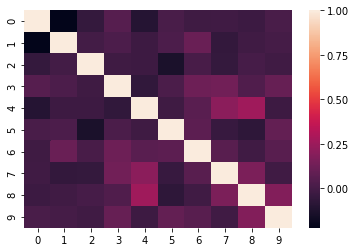

In [32]:
ax = sns.heatmap(sim_matrix, yticklabels=range(10))
plt.show()

In [33]:
print('Key:')
for i in range(10):
    print(i, sim_matrix.index[i])

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

### Drill 0: Test set

In [34]:
x_test_lsa = lsa.transform(x_test_tfidf)

In [35]:
x_test_lsa

array([[ 2.39271874e-03,  2.62288963e-01,  6.91531904e-07, ...,
        -1.38860716e-01,  4.39901630e-02, -3.30411021e-02],
       [ 9.99287538e-01, -1.47301078e-02, -1.13098308e-08, ...,
        -2.48914281e-04, -7.47047843e-04,  1.02058258e-03],
       [ 9.99287538e-01, -1.47301078e-02, -1.13098308e-08, ...,
        -2.48914281e-04, -7.47047843e-04,  1.02058258e-03],
       ...,
       [ 2.13605367e-03,  2.15925031e-01,  2.69998323e-07, ...,
         4.44569104e-03, -2.95439666e-02, -1.25135670e-02],
       [ 2.71336357e-03,  3.52103478e-01, -1.46726114e-08, ...,
        -6.18210336e-02,  5.66194513e-03,  1.93485229e-02],
       [ 2.31951432e-03,  3.89412206e-01, -9.59248590e-07, ...,
         2.14001711e-02,  9.04281395e-02, -9.75285273e-03]])

In [36]:
x_test_lsa.shape

(949, 130)

In [37]:
explained_variance = svd.explained_variance_ratio_

In [38]:
total_variance = explained_variance.sum()
print('Total variance:', total_variance)

Total variance: 0.45189034926951577


In [39]:
## This is what we want because it didn't refit the model. I think.

In [40]:
paras_by_component_test = pd.DataFrame(x_test_lsa, index=x_test)

In [41]:
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component_test.iloc[:, i].sort_values(ascending=False)[0:10])

Component 0:
" Oh !       0.999288
" Oh !       0.999288
" Oh !       0.999288
" Oh !       0.999288
" Oh !       0.999288
" Oh !"      0.999288
" Oh !       0.999288
" Oh !       0.999288
" Oh !       0.999288
" Oh no !    0.999288
Name: 0, dtype: float64
Component 1:
" Well , Mrs . Weston ," said Emma triumphantly when he left them , " what do you say now to Mr . Knightley ' s marrying Jane Fairfax ?"                                                                                                                                                                                                                                                                                                                                                                          0.676158
Frank turned instantly to Emma , to claim her former promise ; and boasted himself an engaged man , which his father looked his most perfect approbation of  and it then appeared that Mrs . Weston was wanting _him_ to dance 

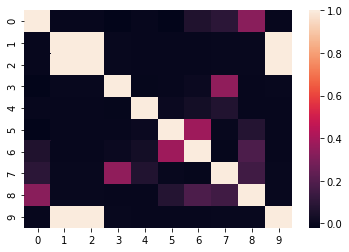

In [42]:
similarity_test = np.asarray(np.asmatrix(x_test_lsa) * np.asmatrix(x_test_lsa).T)
sim_matrix_test = pd.DataFrame(similarity_test, index=x_test).iloc[0:10, 0:10]
ax = sns.heatmap(sim_matrix_test, yticklabels=range(10))
plt.show()

In [43]:
print('Key:')
for i in range(10):
    print(i, sim_matrix_test.index[i])

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1 " Oh !
2 " Oh no , no !
3 Such was Jane Fairfax ' s history .
4 " That has been a good deal the case , my dear ; but not to the degree you mention .
5 " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
6 " And here is Mrs . Weston and Mr . Frank Churchill too ! Quite delightful ; so many friends !"
7 " You may well class the delight , the honour , and the comfo

In [44]:
## The Oh!s are good, but I'm not sure about the similarity of the others!

### Drill 1: Tweaking tf-idf

In [45]:
## Use max_df to catch stopwords

x_train2, x_test2 = train_test_split(emma_paras, test_size=0.4, random_state=0)
vectorizer2 = TfidfVectorizer(max_df=0.5,
                            min_df=2,
                            stop_words=None,
                            lowercase=True,
                            use_idf=True,
                            norm=u'l2',
                            smooth_idf=True)
emma_paras_tfidf2 = vectorizer2.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf2.get_shape()[1])

Number of features: 2178


In [46]:
x_train_tfidf2, x_test_tfidf2 = train_test_split(emma_paras_tfidf2, test_size=0.4, random_state=0)
x_train_lsa2 = lsa.fit_transform(x_train_tfidf2)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print('Percent variance captured by all components:', total_variance*100)

Percent variance captured by all components: 50.838354656808924


In [47]:
## Higher amount of variance = good

In [48]:
paras_by_component2 = pd.DataFrame(x_train_lsa2, index=x_train2)
for i in range(5):
    print('Component {}'.format(i))
    print(paras_by_component2.loc[:, i].sort_values(ascending=False)[0:10])

Component 0
Mrs . Weston was acting no part , feigning no feelings in all that she said to him in favour of the event . She had been extremely surprized , never more so , than when Emma first opened the affair to her ; but she saw in it only increase of happiness to all , and had no scruple in urging him to the utmost . She had such a regard for Mr . Knightley , as to think he deserved even her dearest Emma ; and it was in every respect so proper , suitable , and unexceptionable a connexion , and in one respect , one point of the highest importance , so peculiarly eligible , so singularly fortunate , that now it seemed as if Emma could not safely have attached herself to any other creature , and that she had herself been the stupidest of beings in not having thought of it , and wished it long ago . How very few of those men in a rank of life to address Emma would have renounced their own home for Hartfield !                                                                               

In [49]:
x_test_lsa2 = lsa.transform(x_test_tfidf2)

In [50]:
paras_by_component_test2 = pd.DataFrame(x_test_lsa2, index=x_test2)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component_test2.iloc[:, i].sort_values(ascending=False)[0:10])

Component 0:
Mr . Woodhouse could not be soon reconciled ; but the worst was overcome , the idea was given ; time and continual repetition must do the rest . To Emma ' s entreaties and assurances succeeded Mr . Knightley ' s , whose fond praise of her gave the subject even a kind of welcome ; and he was soon used to be talked to by each , on every fair occasion . They had all the assistance which Isabella could give , by letters of the strongest approbation ; and Mrs . Weston was ready , on the first meeting , to consider the subject in the most serviceable light  first , as a settled , and , secondly , as a good one  well aware of the nearly equal importance of the two recommendations to Mr . Woodhouse ' s mind . It was agreed upon , as what was to be ; and every body by whom he was used to be guided assuring him that it would be for his happiness ; and having some feelings himself which almost admitted it , he began to think that some time or other  in another year or two , perhaps  

In [51]:
## Component 2 - how does it know these are all about getting the wrong idea?

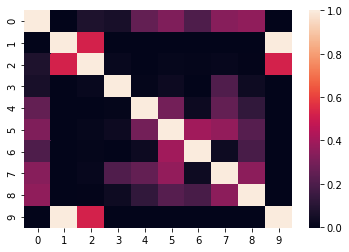

In [52]:
sim_matrix2 = np.asarray(np.asmatrix(x_test_lsa2) * np.asmatrix(x_test_lsa2).T)
sim_matrix2a = pd.DataFrame(sim_matrix2, index=x_test2).iloc[0:10, 0:10]
ax = sns.heatmap(sim_matrix2a, yticklabels=range(10))
plt.show()

In [53]:
print('Key:')
for i in range(10):
    print(i, sim_matrix2a.index[i])

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1 " Oh !
2 " Oh no , no !
3 Such was Jane Fairfax ' s history .
4 " That has been a good deal the case , my dear ; but not to the degree you mention .
5 " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
6 " And here is Mrs . Weston and Mr . Frank Churchill too ! Quite delightful ; so many friends !"
7 " You may well class the delight , the honour , and the comfo

### Try incorporating spaCy

In [54]:
import spacy
nlp = spacy.load('en')

In [55]:
emma_paras[42]

'" Ever since the day  about four years ago  that Miss Taylor and I met with him in Broadway Lane , when , because it began to drizzle , he darted away with so much gallantry , and borrowed two umbrellas for us from Farmer Mitchell \' s , I made up my mind on the subject .'

In [56]:
emma_doc = nlp(gutenberg.raw('austen-emma.txt'))

In [57]:
type(emma_paras)

list

In [58]:
emma_paras[4]

"She was the youngest of the two daughters of a most affectionate , indulgent father ; and had , in consequence of her sister ' s marriage , been mistress of his house from a very early period ."

In [59]:
emma_test = nlp(emma_paras[4])

In [60]:
emma_test

She was the youngest of the two daughters of a most affectionate , indulgent father ; and had , in consequence of her sister ' s marriage , been mistress of his house from a very early period .

In [61]:
type(emma_test)

spacy.tokens.doc.Doc

In [62]:
emma_nlp = []
for paragraph in emma_paras:
    para = nlp(paragraph)
    emma_nlp.append(para)

In [63]:
emma_nlp[3]

Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .

In [64]:
type(emma_nlp[3])

spacy.tokens.doc.Doc

In [65]:
for word in emma_nlp[3]:
    print(word.lemma_)

Emma
Woodhouse
,
handsome
,
clever
,
and
rich
,
with
a
comfortable
home
and
happy
disposition
,
seem
to
unite
some
of
the
good
blessing
of
existence
;
and
have
live
nearly
twenty
-
one
year
in
the
world
with
very
little
to
distress
or
vex
-PRON-
.


In [66]:
emma_lemma = []
for paragraph in emma_nlp:
    para_lemma = []
    for word in paragraph:
        word_lemma = word.lemma_
        para_lemma.append(word_lemma)
    emma_lemma.append(' '.join(para_lemma))

In [67]:
emma_lemma

['[ Emma by Jane Austen 1816 ]',
 'volume -PRON-',
 'chapter -PRON-',
 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seem to unite some of the good blessing of existence ; and have live nearly twenty - one year in the world with very little to distress or vex -PRON- .',
 "-PRON- be the young of the two daughter of a most affectionate , indulgent father ; and have , in consequence of -PRON- sister ' s marriage , be mistress of -PRON- house from a very early period .",
 "sixteen year have Miss Taylor be in Mr . woodhouse ' s family , less as a governess than a friend , very fond of both daughter , but particularly of Emma .",
 "the real evil , indeed , of Emma ' s situation be the power of have rather too much -PRON- own way , and a disposition to think a little too well of -PRON- ; these be the disadvantage which threaten alloy to -PRON- many enjoyment .",
 'sorrow come   a gentle sorrow   but not at all in the shape of any disagreeable

In [68]:
## Vectorize using lemma version

x_train3, x_test3 = train_test_split(emma_lemma, test_size=0.4, random_state=0)
vectorizer3 = TfidfVectorizer(max_df=0.8,
                            min_df=2,
                            stop_words='english',
                            lowercase=False,
                            use_idf=True,
                            norm=u'l2',
                            smooth_idf=True)
emma_lemma_tfidf = vectorizer3.fit_transform(emma_lemma)
print("Number of features: %d" % emma_lemma_tfidf.get_shape()[1])

Number of features: 1608


In [69]:
vectorizer3.get_feature_names()

['Abbey',
 'Anne',
 'April',
 'Aye',
 'Bates',
 'Bath',
 'Bickerton',
 'Box',
 'CHAPTER',
 'Campbell',
 'Campbells',
 'Can',
 'Captain',
 'Christmas',
 'Churchill',
 'Churchills',
 'Cole',
 'Coles',
 'Colonel',
 'Could',
 'Cox',
 'Crown',
 'Dear',
 'December',
 'Dixon',
 'Dixons',
 'Do',
 'Don',
 'Donwell',
 'Elton',
 'Eltons',
 'Emma',
 'End',
 'Enscombe',
 'Fairfax',
 'Farm',
 'Ford',
 'Frank',
 'George',
 'Gilbert',
 'God',
 'Goddard',
 'Good',
 'Grove',
 'Harriet',
 'Hartfield',
 'Have',
 'Hawkins',
 'Henry',
 'Highbury',
 'Hill',
 'Humph',
 'III',
 'Ireland',
 'Isabella',
 'James',
 'Jane',
 'John',
 'June',
 'Kitty',
 'Knightley',
 'Knightleys',
 'Lane',
 'Larkins',
 'London',
 'Lords',
 'Maple',
 'Martin',
 'Martins',
 'May',
 'Midsummer',
 'Mill',
 'Miss',
 'More',
 'Mr',
 'Mrs',
 'Nay',
 'Nobody',
 'Nothing',
 'November',
 'October',
 'PRON',
 'Patty',
 'Perry',
 'Poor',
 'Randalls',
 'Richmond',
 'Robert',
 'Saturday',
 'September',
 'Sir',
 'Smallridge',
 'Smith',
 'Somebody

In [70]:
x_train_tfidf3, x_test_tfidf3 = train_test_split(emma_lemma_tfidf, test_size=0.4, random_state=0)
x_train_lsa3 = lsa.fit_transform(x_train_tfidf3)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print('Percent variance captured by all components:', total_variance*100)

Percent variance captured by all components: 50.17193618847079


In [71]:
paras_by_component3 = pd.DataFrame(x_train_lsa3, index=x_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.iloc[:, i].sort_values(ascending=False)[:10])

Component 0:
" Oh !     0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !"    0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !"    0.999288
" Oh !     0.999288
" Oh !     0.999288
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.634358
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.577568
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I think it a bad thing ."    0.564846
" You are right , Mrs . Weston ," said Mr . Knightley warmly , " Miss Fairfax is as capable as any of us of forming a just opinion of Mrs . Elton .                         0.564677
" There were misunderstand

In [72]:
x_test_lsa3 = lsa.transform(x_test_tfidf3)

In [73]:
paras_by_component_test3 = pd.DataFrame(x_test_lsa3, index=x_test)

for i in range(10):
    print('Component {}:'.format(i))
    print(paras_by_component_test3.loc[:, i].sort_values(ascending=False)[:10])
    print('\n')

Component 0:
" As to that  I do not "                              0.931788
" He did .                                            0.931788
" Did you ever see such a skin ? such smoothness !    0.931788
" I am going to Kingston .                            0.931788
" Not I , indeed .                                    0.931788
" Me !"                                               0.931788
" Me !                                                0.931788
" Him ! never , never .                               0.931788
" Must I go first ?                                   0.931788
" There it is .                                       0.931788
Name: 0, dtype: float64


Component 1:
" Oh !     0.999237
" Oh !     0.999237
" Oh !     0.999237
" Oh !     0.999237
" Oh !     0.999237
" Oh !"    0.999237
" Oh !     0.999237
" Oh !     0.999237
" Oh !     0.999237
" Oh !     0.999237
Name: 1, dtype: float64


Component 2:
After tea , Mr . and Mrs . Weston , and Mr . Elton sat down with Mr . Woodhouse